# *Importing Modules*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# *Reading DF*

In [2]:
df = pd.read_csv(r'D:\CSV_Files\Mall_Customers.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df['CustomerID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [5]:
len(df['CustomerID'].unique())

200

In [6]:
df.drop('CustomerID',axis=1,inplace=True)

In [7]:
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

In [8]:
# Not preffred to encode feature when using clustering 

# *EDA*

In [9]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x22422ee8210>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.0%'),
  Text(0.11242879316591654, -0.5893723495951058, '44.0%')])

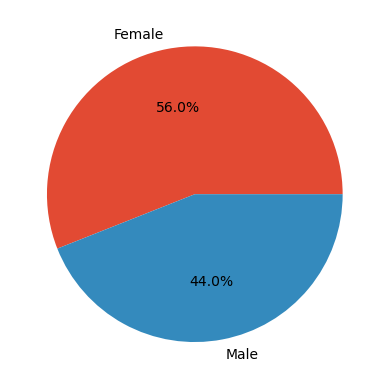

In [11]:
index = df['Gender'].value_counts().index
values =  df['Gender'].value_counts().values
plt.pie(values,labels=index,autopct='%1.1f%%')

Text(0, 0.5, 'Count')

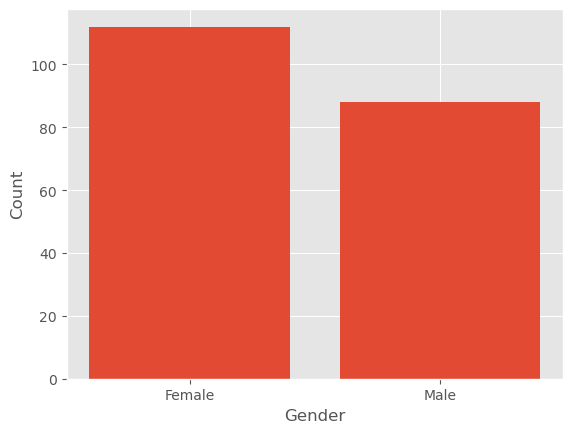

In [12]:
plt.bar(index,values)
plt.xlabel('Gender')
plt.ylabel('Count')

<Axes: xlabel='Age', ylabel='Density'>

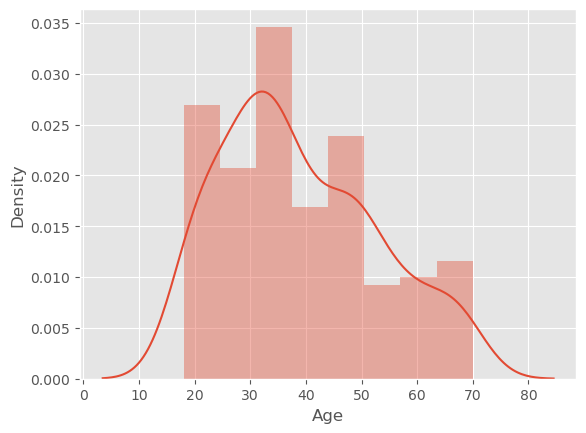

In [13]:
sns.distplot(df['Age'])

In [14]:
df['Age'].skew()

0.48556885096681657

<Axes: xlabel='Age', ylabel='Count'>

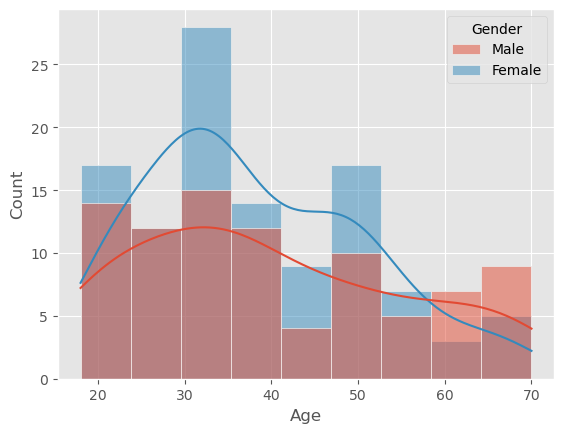

In [16]:
sns.histplot(data=df,x='Age',hue='Gender',kde=True)

Text(0, 0.5, 'Annual Income')

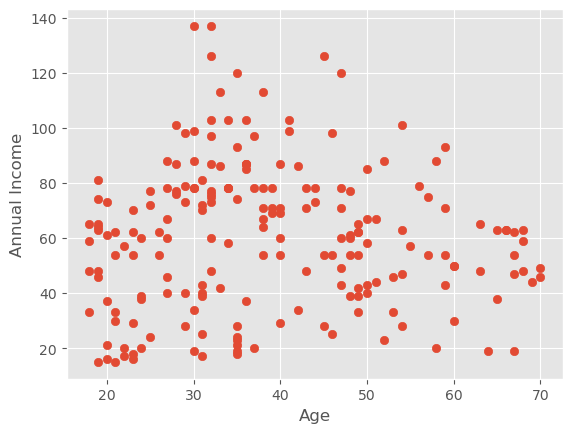

In [23]:
plt.scatter(df['Age'],df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income')

Text(0, 0.5, 'Spending Score (1-100)')

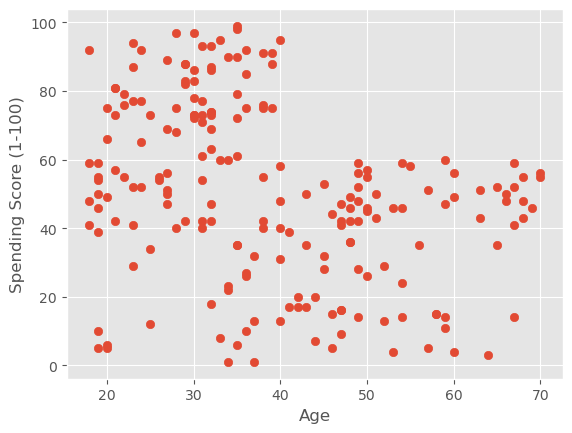

In [25]:
plt.scatter(df['Age'],df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

<Axes: >

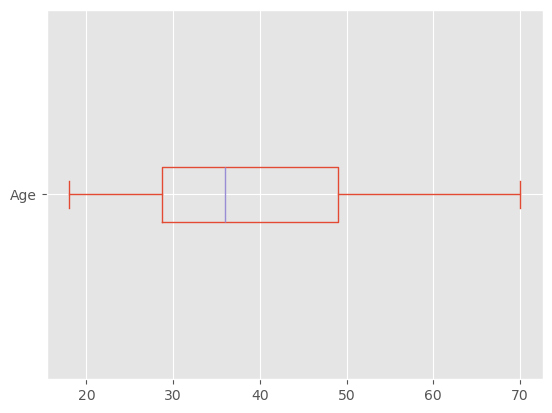

In [28]:
df['Age'].plot(kind='box',vert=False)

In [24]:
df['Age'].corr(df['Annual Income (k$)'])

-0.012398042736060145

In [26]:
df['Spending Score (1-100)'].corr(df['Age'])

-0.32722684603909014

In [29]:
# Age range from 20 to 60 ==> Female has greater count 
# Age range above 60 ==> Male 
# No corr between Age and Annual Income 
# Above Age =40 score (MIN)

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

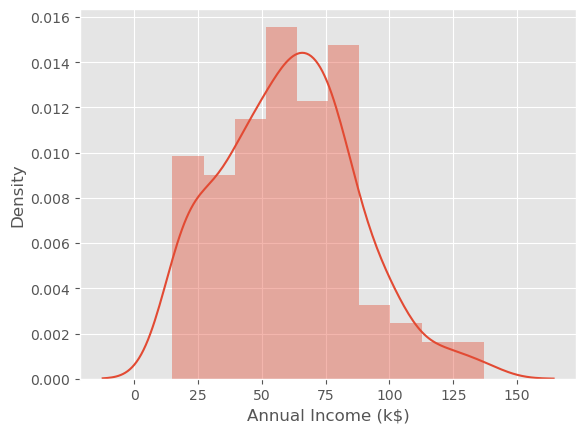

In [30]:
sns.distplot(df['Annual Income (k$)'])

<Axes: >

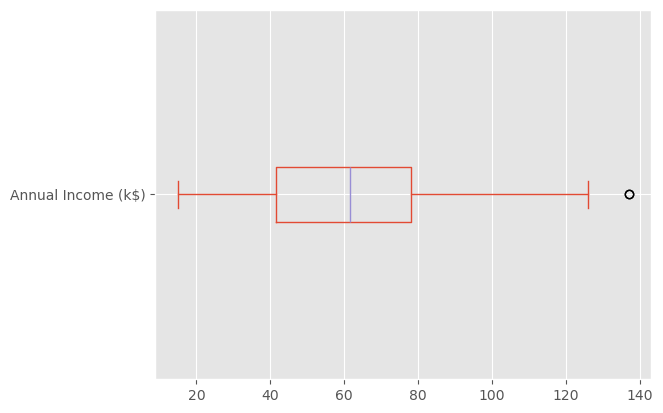

In [31]:
df['Annual Income (k$)'].plot(kind='box',vert=False)

In [32]:
df['Annual Income (k$)'].skew()

0.3218425498619055

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

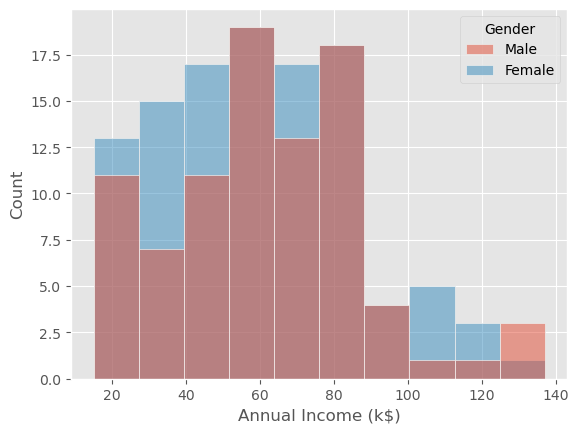

In [33]:
sns.histplot(data=df,x='Annual Income (k$)',hue='Gender')

Text(0, 0.5, 'Spending Score (1-100)')

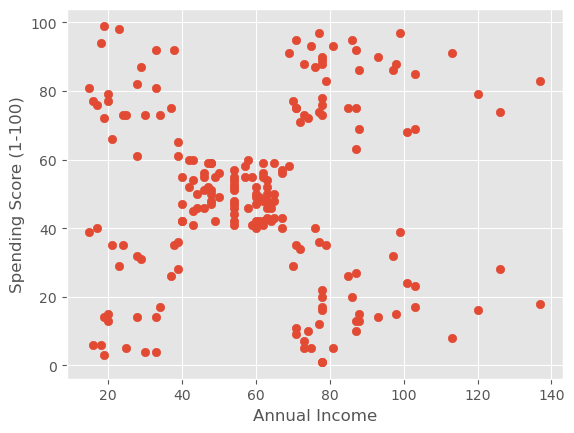

In [34]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')

In [35]:
# Annual Income has Almost Normal Distribution
# Below 50 Annual Income Female has more count (OK)
# relation between Spending score and annual income shown as clusters

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

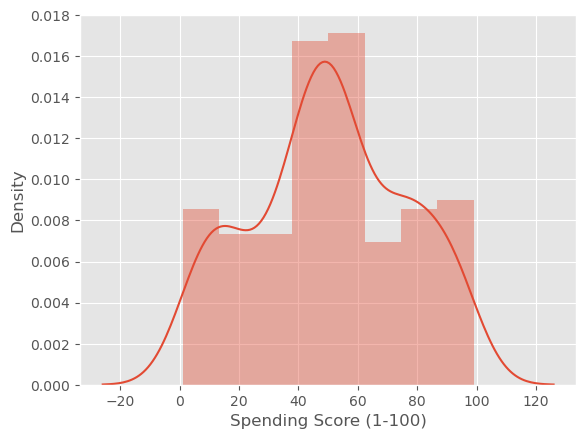

In [36]:
sns.distplot(df['Spending Score (1-100)'])

In [37]:
df['Spending Score (1-100)'].skew()

-0.047220201374263374

<Axes: >

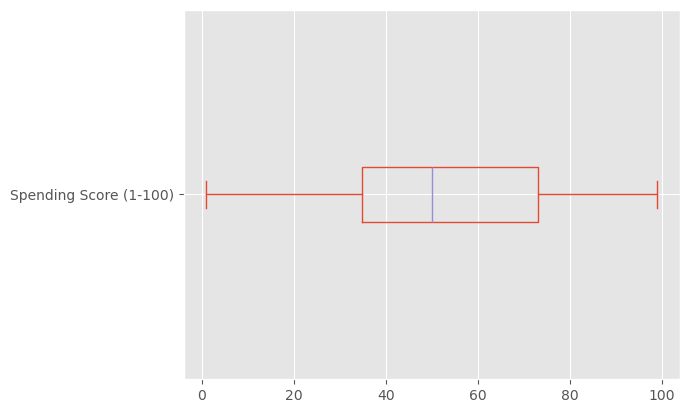

In [38]:
df['Spending Score (1-100)'].plot(kind='box',vert=False)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

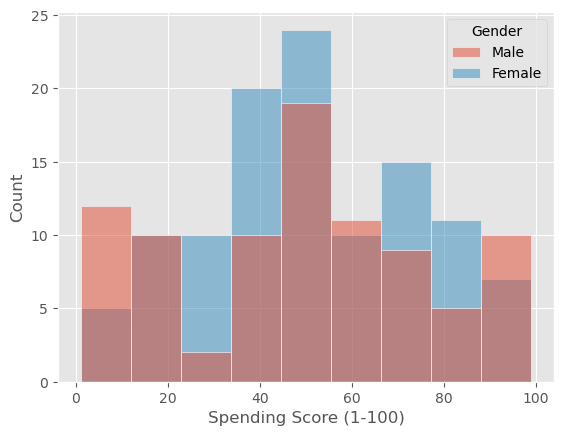

In [39]:
sns.histplot(data=df,x='Spending Score (1-100)',hue='Gender')

In [40]:
# Score from 20 to 90 Female has more count outside male has more count 
# Score is normaly distributed

In [42]:
X = df.drop('Gender',axis=1)

In [43]:
X.head()

Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

# *Clustering*

Text(0.5, 0, 'K')

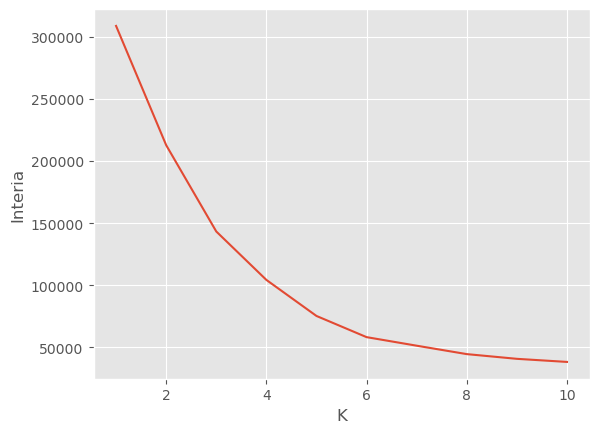

In [45]:
from sklearn.cluster import KMeans
interia = []
for i in range(1,11):
    model = KMeans(n_clusters=i,init='k-means++',random_state=101,max_iter=10000)
    model.fit(X)
    interia.append(model.inertia_)
plt.plot(list(range(1,11)),interia)
plt.ylabel('Interia')
plt.xlabel('K')

In [47]:
!pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   -- ------------------------------------ 20.5/282.6 kB 330.3 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/282.6 kB 435.7 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/282.6 kB 469.7 kB/s eta 0:00:01
   ---------------- --------------------- 122.9/282.6 kB 654.9 kB/s eta 0:00:01
   ----------------------- -------------- 174.1/282.6 kB 807.1 kB/s eta 0:00:01
   ------------------------------ ------- 225.3/282.6 kB 860.2 kB/s eta 0:00:01
   -------------------------------------  276.5/282.6 kB 896.4 kB/s eta 0:00:01
   -------------------------------------- 282.6/282.6 kB 873.0 kB/s eta 0:00:00


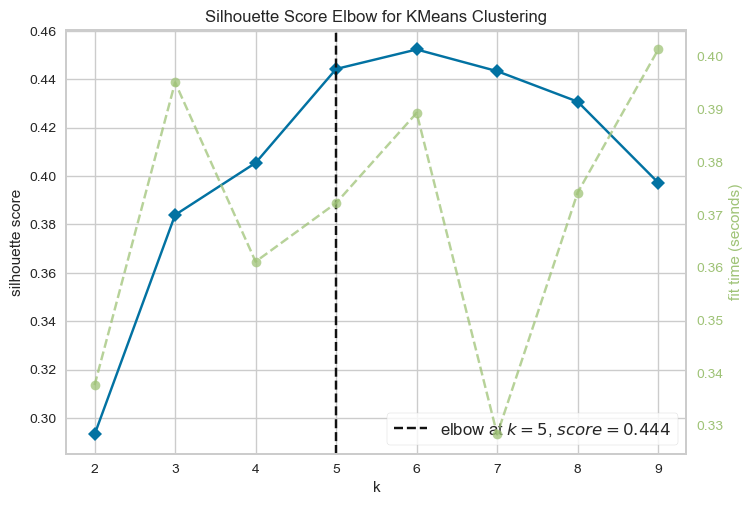

In [53]:
model = KMeans(init='k-means++',random_state=101)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(X)
visualizer.show()
plt.show()

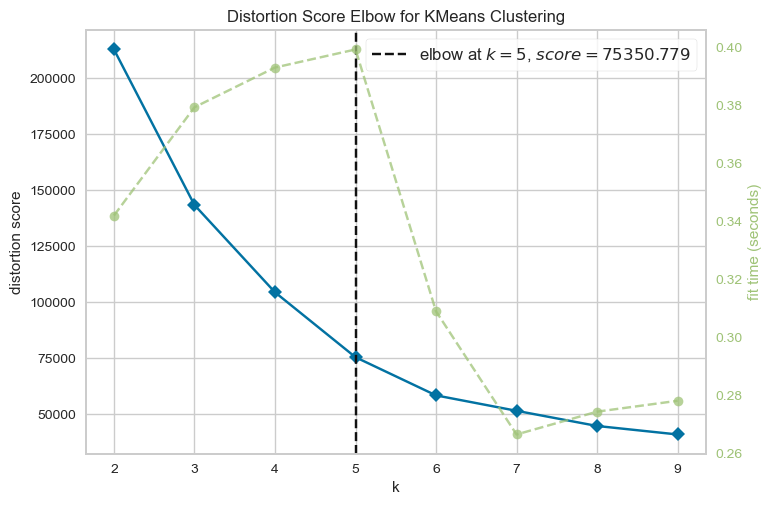

In [56]:
model = KMeans(init='k-means++',random_state=101)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)
visualizer.show()
plt.show()

In [70]:
model = KMeans(init='k-means++',random_state=101,n_clusters=5,max_iter=10000)
model.fit(X)

KMeans(max_iter=10000, n_clusters=5, random_state=101)

In [71]:
model.inertia_

75350.77917248776

In [72]:
df['k_means_clusters']=model.labels_
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)  k_means_clusters
0    Male   19                  15                      39                 4
1    Male   21                  15                      81                 2
2  Female   20                  16                       6                 4
3  Female   23                  16                      77                 2
4  Female   31                  17                      40                 4

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

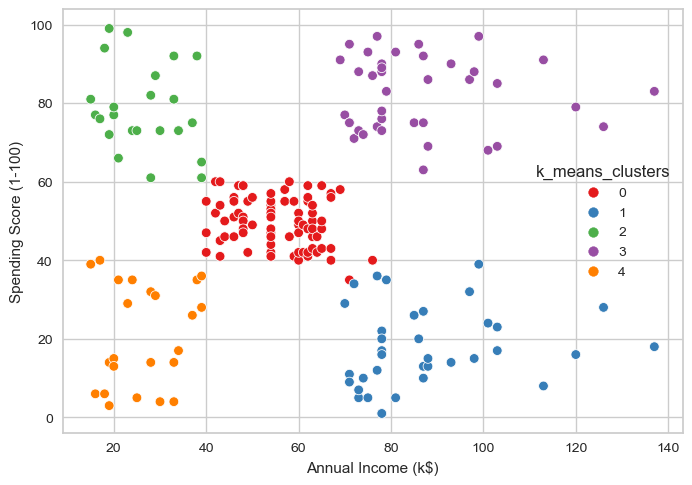

In [73]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='k_means_clusters',palette='Set1', legend='full')

<Axes: xlabel='Annual Income (k$)', ylabel='Age'>

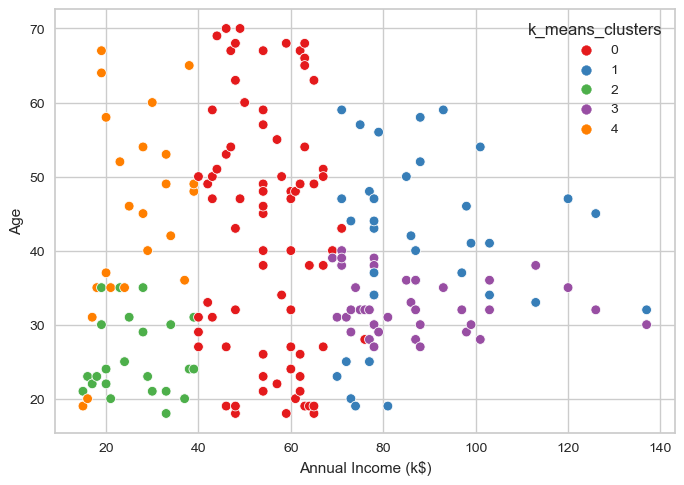

In [74]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Age',hue='k_means_clusters',palette='Set1', legend='full')

In [75]:
df['k_means_clusters'].value_counts()

k_means_clusters
0    79
3    39
1    36
4    23
2    23
Name: count, dtype: int64

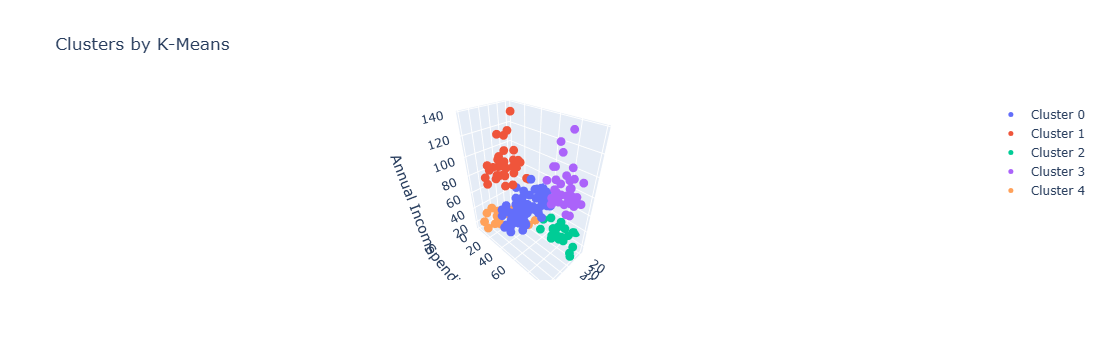

In [84]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['k_means_clusters']==n]['Age'],
        y = db[db['k_means_clusters']==n]['Spending Score (1-100)'],
        z = db[db['k_means_clusters']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(df, 0, 'Cluster 0')
trace1 = tracer(df, 1, 'Cluster 1')
trace2 = tracer(df, 2, 'Cluster 2')
trace3 = tracer(df, 3, 'Cluster 3')
trace4 = tracer(df, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

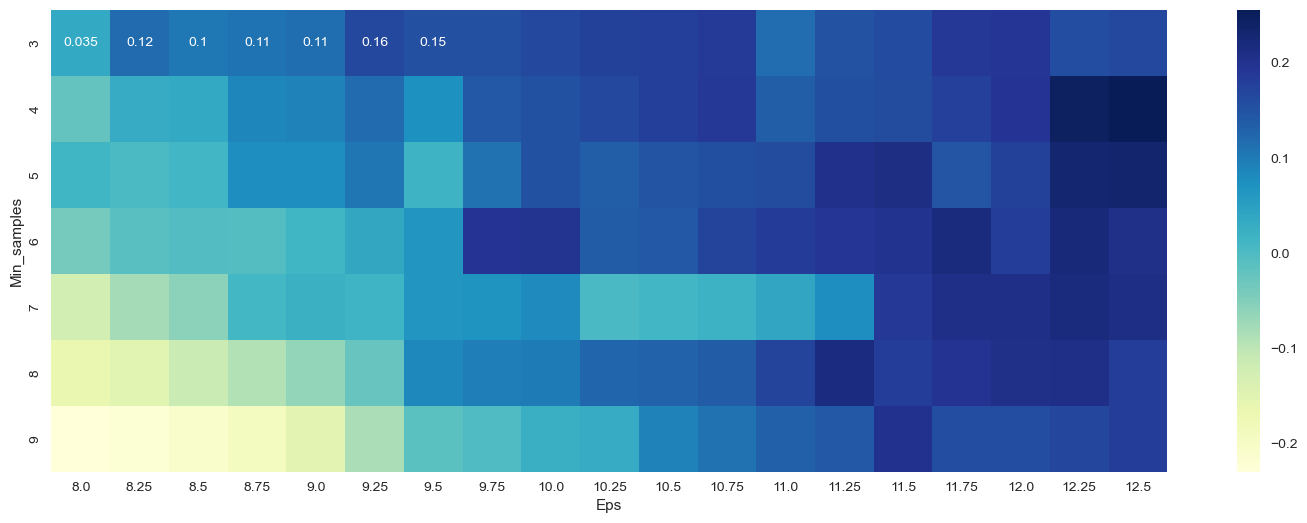

In [87]:
from sklearn.cluster import DBSCAN
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))
from sklearn.metrics import silhouette_score
no_of_clusters = []
sil_score = []
for ep,mn_sp in DBSCAN_params:
    model = DBSCAN(eps=ep,min_samples=mn_sp)
    model.fit(X)
    no_of_clusters.append(len(np.unique(model.labels_)))
    sil_score.append(silhouette_score(X, model.labels_))
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [88]:
# eps = 12.5 & min_samples=4
model=DBSCAN(eps=12.5,min_samples=4)
model.fit(X)

DBSCAN(eps=12.5, min_samples=4)

In [89]:
df['Dbscan_cluters']=model.labels_
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)  k_means_clusters  \
0    Male   19                  15                      39                 4   
1    Male   21                  15                      81                 2   
2  Female   20                  16                       6                 4   
3  Female   23                  16                      77                 2   
4  Female   31                  17                      40                 4   

   Dbscan_cluters  
0               0  
1               0  
2              -1  
3               0  
4               0

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

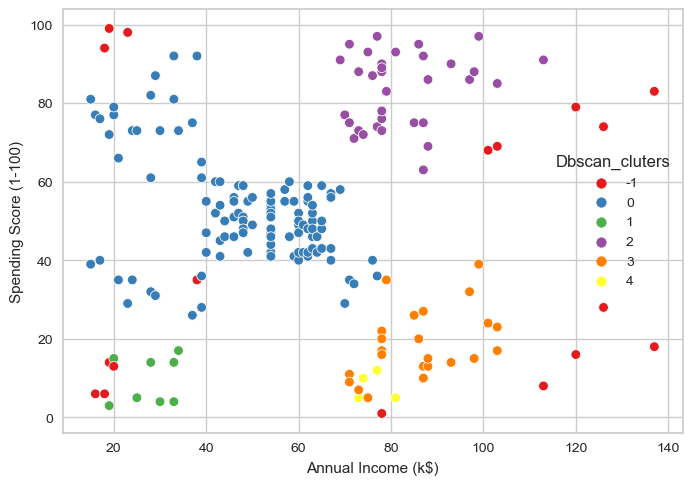

In [91]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Dbscan_cluters',palette='Set1', legend='full')

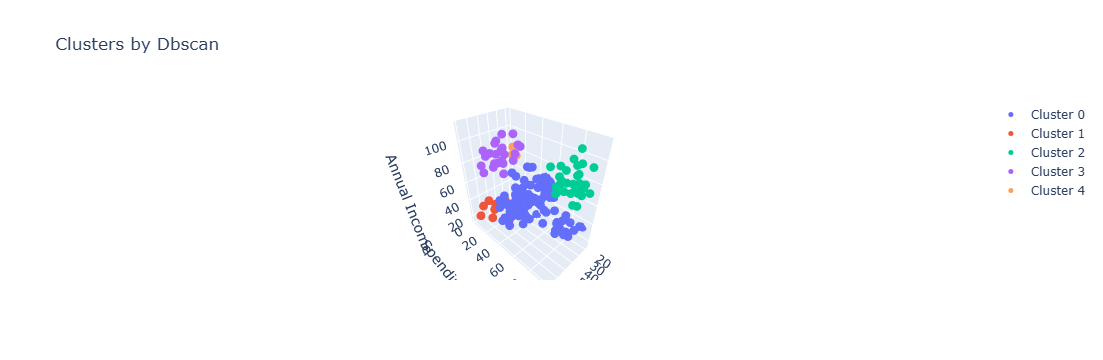

In [92]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Dbscan_cluters']==n]['Age'],
        y = db[db['Dbscan_cluters']==n]['Spending Score (1-100)'],
        z = db[db['Dbscan_cluters']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(df, 0, 'Cluster 0')
trace1 = tracer(df, 1, 'Cluster 1')
trace2 = tracer(df, 2, 'Cluster 2')
trace3 = tracer(df, 3, 'Cluster 3')
trace4 = tracer(df, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by Dbscan',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [93]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(affinity='euclidean', linkage='average')
model.fit(X)

AgglomerativeClustering(affinity='euclidean', linkage='average')

In [94]:
df['AgglomerativeClustering']=model.labels_
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)  k_means_clusters  \
0    Male   19                  15                      39                 4   
1    Male   21                  15                      81                 2   
2  Female   20                  16                       6                 4   
3  Female   23                  16                      77                 2   
4  Female   31                  17                      40                 4   

   Dbscan_cluters  AgglomerativeClustering  
0               0                        0  
1               0                        0  
2              -1                        0  
3               0                        0  
4               0                        0

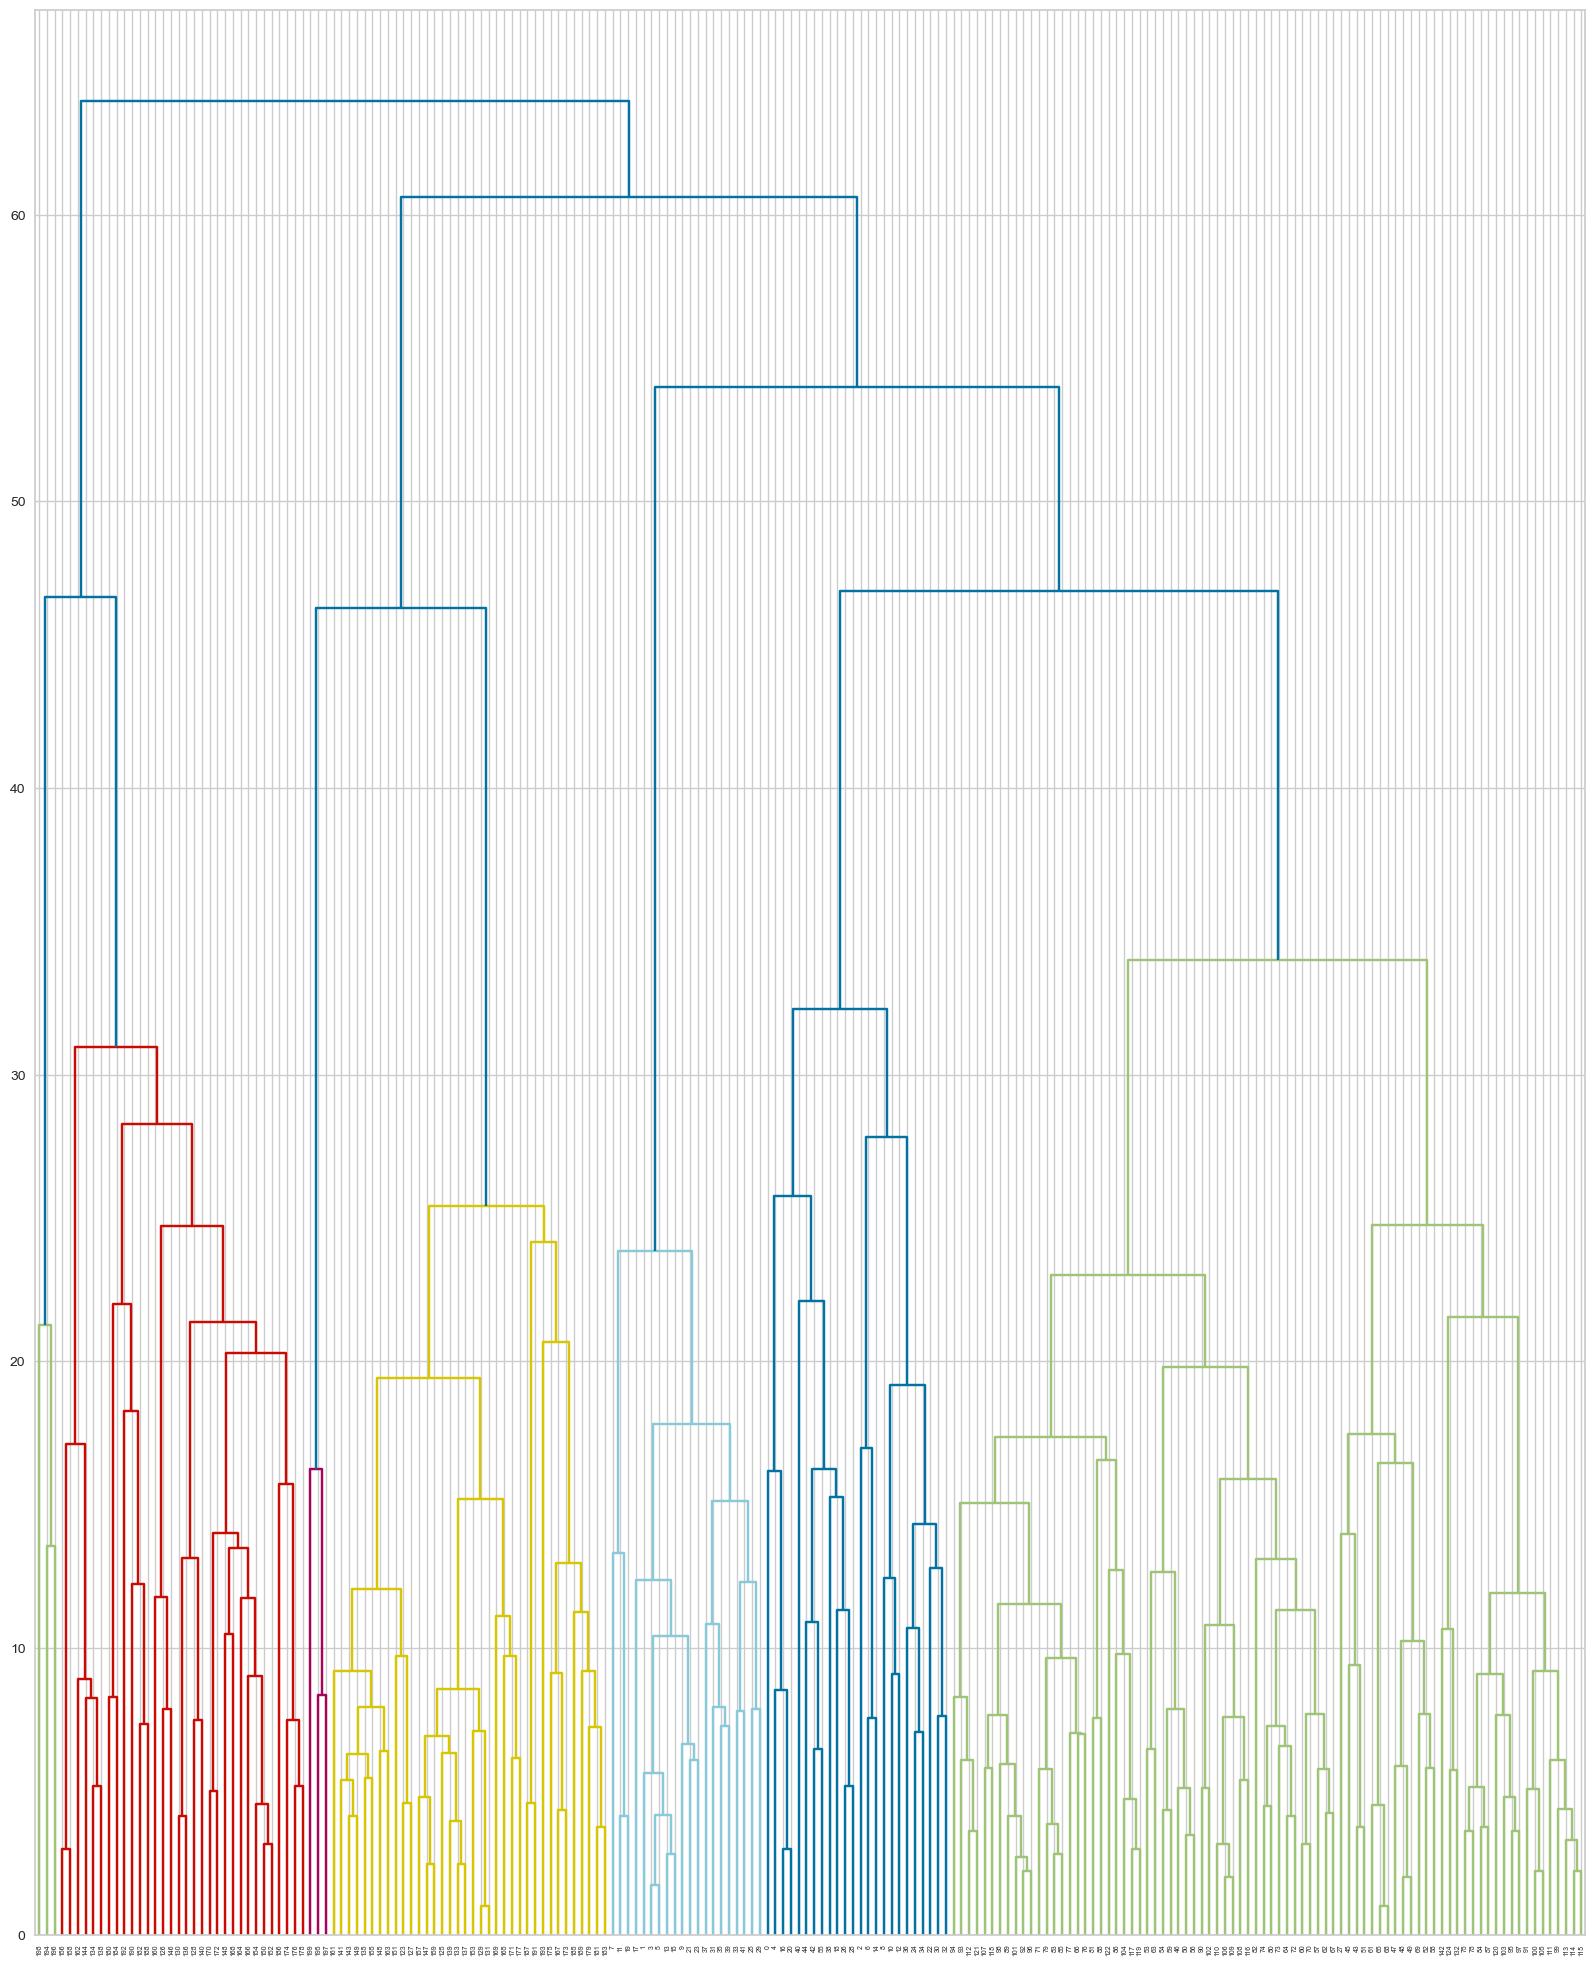

In [95]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (20,25))
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

In [96]:
df['AgglomerativeClustering'].value_counts()

AgglomerativeClustering
0    165
1     35
Name: count, dtype: int64

In [97]:
df.drop('AgglomerativeClustering',axis=1,inplace=True)

In [ ]:
# The optimal is 7